In [1]:
import pandas as pd
import numpy as np
import json
import pickle
from pprint import pprint
from collections import defaultdict

df = pd.read_csv('tmdb-5000-movies.csv.gz', compression='gzip')
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.head()

In [ ]:
df.info()

In [33]:
from copy import copy, deepcopy
import json
ndf = deepcopy(df[['id','title','budget','revenue','release_date','popularity','runtime','production_companies','production_countries','vote_average']])
ndf['production_companies_names'] = ndf.apply(lambda row: ', '.join([comp['name'] for comp in json.loads(row.production_companies)]), axis=1)
ndf['production_countries_names'] = ndf.apply(lambda row: ', '.join([coun['name'] for coun in json.loads(row.production_countries)]), axis=1)
ndf['no_production_companies'] = ndf.apply(lambda row: len(json.loads(row['production_companies'])), axis=1)
ndf['no_production_countries'] = ndf.apply(lambda row: len(json.loads(row['production_countries'])), axis=1)
ndf = ndf.drop(['production_companies','production_countries'], axis=1)
ndf = ndf.dropna()
ndf = ndf.drop(index=ndf[(ndf['budget']==0) | (ndf['revenue']==0)].index)

# pprint(ndf.info())
# ndf

In [ ]:
# import json
# from sqlalchemy import create_engine
# import sqlite3

# conn = sqlite3.connect('movies')
# cursor = conn.cursor()

# # engine = create_engine('sqlite:///movies')
# # engine = create_engine("mysql+mysqlconnector://atiti@localhost/moviesdb")
# # df.to_sql('movies_table', con=engine, if_exists='replace', index=False)

## Movies with revenue around/less/more than xxx million

In [ ]:
M=int(100e6) # units of 100 million
grp_revenue = ndf.groupby(lambda indx: round(ndf['revenue'][indx]/M)*M)
rev_df = dict()
for rev_key in grp_revenue.groups:
    rev_df[rev_key] = grp_revenue.get_group(rev_key).sort_values(
        by='revenue', 
        key=lambda y: abs(y-rev_key)
    )[['id','title','revenue']]

rev_df[int(1e9)].head() # 1 billion

In [ ]:
rev_df.get(600e6)

In [ ]:
threshold = int(20e6)
targetval = int(600e6)
operation = lambda x: (x-targetval)
type = 'revenue'
df.loc[(df[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

In [ ]:
M=int(100e6) # units of 100 million
grp_revenuel = ndf.groupby(lambda indx: round(ndf['revenue'][indx]/M+0.5)*M)
grp_revenuem = ndf.groupby(lambda indx: round(ndf['revenue'][indx]/M-0.5)*M)
rev_df_lessthan = dict()
rev_df_morethan = dict()
for rev_key in grp_revenuel.groups:
    rev_df_lessthan[rev_key] = grp_revenuel.get_group(rev_key).sort_values(
        by='revenue', 
        key=lambda y: -(y-rev_key)
    )[['id','title','revenue']]
for rev_key in grp_revenuem.groups:
    rev_df_morethan[rev_key] = grp_revenuem.get_group(rev_key).sort_values(
        by='revenue', 
        key=lambda y: (y-rev_key)
    )[['id','title','revenue']]

rev_df_lessthan[int(1e9)].head() # less than 1 billion

In [ ]:
rev_df_morethan[int(1e9)].head() # more than 1 billion

## Movies with budget around/less/more than xxx million

In [ ]:
M=int(1e6) # units of 1 million
grp_budget = ndf.groupby(lambda indx: round(ndf['budget'][indx]/M)*M)
grp_budgetl = ndf.groupby(lambda indx: round(ndf['budget'][indx]/M+0.5)*M)
grp_budgetm = ndf.groupby(lambda indx: round(ndf['budget'][indx]/M-0.5)*M)
bud_df = dict()
bud_df_lessthan = dict()
bud_df_morethan = dict()
for bud_key in grp_budget.groups:
    bud_df[bud_key] = grp_budget.get_group(bud_key).sort_values(
        by='budget', 
        key=lambda y: abs(y-bud_key)
    )[['id','title','budget']]
for bud_key in grp_budgetl.groups:
    bud_df_lessthan[bud_key] = grp_budgetl.get_group(bud_key).sort_values(
        by='budget', 
        key=lambda y: -(y-bud_key)
    )[['id','title','budget']]
for bud_key in grp_budgetm.groups:
    bud_df_morethan[bud_key] = grp_budgetm.get_group(bud_key).sort_values(
        by='budget', 
        key=lambda y: (y-bud_key)
    )[['id','title','budget']]

bud_df[int(225e6)].head(10) # 225 million

In [ ]:
bud_df_morethan[int(214e6)].head()

In [ ]:
bud_df_lessthan[int(210e6)].head()

In [ ]:
threshold = int(20e6)
targetval = int(225e6)
operation = lambda x: abs(x-targetval)
type = 'budget'
df.loc[(df[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

## Movies with runtime around/less/more than xx minutes

In [ ]:
M=10 # units of 10 minutes
grp_runtime = ndf.drop([4770,4802]).groupby(lambda indx: round(ndf['runtime'][indx]/M)*M )
grp_runtimel = ndf.drop([4770,4802]).groupby(lambda indx: round(ndf['runtime'][indx]/M+0.5)*M )
grp_runtimem = ndf.drop([4770,4802]).groupby(lambda indx: round(ndf['runtime'][indx]/M-0.5)*M )
runt_df = dict()
runt_df_lessthan = dict()
runt_df_morethan = dict()
for runt_key in grp_runtime.groups:
    runt_df[runt_key] = grp_runtime.get_group(runt_key).sort_values(
        by='runtime', 
        key=lambda y: abs(y-runt_key)
    )[['id','title','runtime']]
for runt_key in grp_runtimel.groups:
    runt_df_lessthan[runt_key] = grp_runtimel.get_group(runt_key).sort_values(
        by='runtime', 
        key=lambda y: -(y-runt_key)
    )[['id','title','runtime']]
for runt_key in grp_runtimem.groups:
    runt_df_morethan[runt_key] = grp_runtimem.get_group(runt_key).sort_values(
        by='runtime', 
        key=lambda y: (y-runt_key)
    )[['id','title','runtime']]
    
runt_df[170].head(10) # 170 minutes

In [ ]:
runt_df_lessthan[170].head()

In [ ]:
runt_df_morethan[170].head()

In [ ]:
threshold = int(10)
targetval = int(170)
operation = lambda x: abs(x-targetval)
type = 'runtime'
df.loc[(df[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

## Movies released around/before/after xxx year/month

In [ ]:
M = 'M' # 1 month interval
grp_release_date = ndf.drop([4783]).groupby(
    lambda indx: ndf['release_date'][indx].to_period(M).start_time
)
release_df = dict()
for date_key in grp_release_date.groups:
    release_df[date_key] = grp_release_date.get_group(date_key).sort_values(
        by='release_date',
        key=lambda y: abs((y - date_key).dt.days)
    )[['id', 'title', 'release_date']]

def release_df_get(date):
    k=min(release_df.keys(), key=lambda x: abs(x-pd.Timestamp(date)))
    if k!=date : print(f"### getting for nearest valid number = {k}")
    return release_df.get(k)
release_df[pd.Timestamp('2000-12')].head() # released dec 2000
# release_df_get('2000-12-01')

In [ ]:
rdf = pd.DataFrame([[rdf,len(release_df[rdf])] for rdf in release_df], columns=['release_month', 'no_movies']).set_index('release_month')
ndf[['title','release_date']].sort_values('release_date',ascending=False).head(10)

In [ ]:
threshold = pd.Timedelta(50,'W')
targetval = pd.Timestamp('2000-12-09')
operation = lambda x: abs(x-targetval)
type = 'release_date'
df.loc[(df[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

## Movies with popularity yyy

In [ ]:
# units of 1 point
grp_popularity = ndf.groupby(lambda indx: round(ndf['popularity'][indx]+0.5))
pop_df = dict()
for pop_key in grp_popularity.groups:
    pop_df[pop_key] = grp_popularity.get_group(pop_key).sort_values(
        by='popularity', 
        key=lambda y: abs(y-pop_key)
    )[['id','title','popularity']]
pop_df.pop(0)
print(f'minimum popularity: {min(pop_df.keys())}\n'
    f'maximum popularity: {max(pop_df.keys())}')

# popularity b/w 30-32

def pop_df_get(p, dfdict):
    k=min(dfdict.keys(), key=lambda x: abs(x-p))
    print(f"### getting for nearest valid number = {k}")
    return dfdict.get(k)
pop_df_get(700, pop_df)

In [ ]:
threshold = 50
targetval = 700
operation = lambda x: abs(x-targetval)
type = 'popularity'
df.loc[(df[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

## Movies with xx number of production companies

In [ ]:
import json

grp_compy = df.groupby(lambda indx: len(json.loads(df['production_companies'][indx])))
compy_df = dict()
for no_compy in grp_compy.groups:
    temp_df = grp_compy.get_group(no_compy)[['id','title','production_companies']]
    temp_df['no_production_companies'] = temp_df.apply(lambda row: len(json.loads(row['production_companies'])), axis=1)
    temp_df['production_companies_names'] = temp_df.apply(lambda row: ', '.join([comp['name'] for comp in json.loads(row.production_companies)]), axis=1)
    temp_df = temp_df.drop('production_companies', axis=1)
    compy_df[no_compy] = temp_df
print(compy_df.keys())
compy_df.get(16) # 16 production companies

In [ ]:
threshold = 1
targetval = 16
operation = lambda x: abs(x-targetval)
type = 'no_production_companies'
ndf.loc[(ndf[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

## Movies with xx number of production countries

In [ ]:
import json

grp_couny = df.groupby(lambda indx: len(json.loads(df['production_countries'][indx])))
couny_df = dict()
for no_couny in grp_couny.groups:
    temp_df = grp_couny.get_group(no_couny)[['id','title','production_countries']]
    temp_df['no_production_countries'] = temp_df.apply(lambda row: len(json.loads(row['production_countries'])), axis=1)
    temp_df['production_countries_names'] = temp_df.apply(lambda row: ', '.join([coun['name'] for coun in json.loads(row.production_countries)]), axis=1)
    temp_df = temp_df.drop('production_countries', axis=1)
    couny_df[no_couny] = temp_df
pprint(couny_df.keys())
couny_df.get(4).head() # 4 production countries

In [ ]:
threshold = 1
targetval = 4
operation = lambda x: abs(x-targetval)
type = 'no_production_countries'
ndf.loc[(ndf[type]-targetval).abs().lt(threshold),['title',type]]\
    .sort_values(type, ascending=True, key=operation)

# Numbers

In [39]:
numbers = dict()
for cat in ndf.columns[2:]:
    numbers[cat] = ndf[cat].unique()
numbers.pop('production_companies_names')
numbers.pop('production_countries_names')
numbers['revenue'] = numbers['revenue'][numbers['revenue']>0]
numbers['budget'] = numbers['budget'][numbers['budget']>0]
numbers['runtime'] = numbers['runtime'][pd.notna(numbers['runtime'])]
print(numbers.keys())
print(numbers['no_production_companies'])
print(numbers['no_production_countries'])

dict_keys(['budget', 'revenue', 'release_date', 'popularity', 'runtime', 'vote_average', 'no_production_companies', 'no_production_countries'])
[ 2  1 26  3  4  5  6  7  8  9  0 11 16 10 21 12 13 17 14 18 19]
[ 1 12  2  4  3  5  8  7  6  0]


0.000372


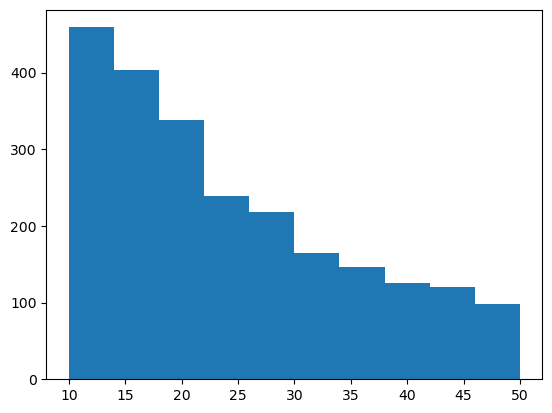

In [258]:
import matplotlib.pyplot as plt
plt.hist(numbers['popularity'][(numbers['popularity']<50) & (numbers['popularity']>10)])
print(numbers['popularity'][numbers['popularity']<200].min())

# Queries

In [ ]:
with open('ret_index.json', 'rb') as f:
    NQ = json.load(f)

# quantity
- number, float
- if date : string (YYYY-MM-DD)
# scalefactor          
- money : 'million', 'billion'
- date, countries, companies, popularity : 'unity'
- date/single year/month : 'unity'
- era/decades (90's): 'late', 'early', 'mid'
# unit
- 'dollar'
- 'minute', 'hour'
- 'countries' / 'companies'
- 'year', 'month', 'date', 'decade'
- popularity : 'points'
# type
- 'revenue', 'budget', 'runtime', 'release_date', 'popularity', 'release_date', 'no_production_countries', 'no_production_companies'
# operation
- 'around',  'between',  'exact',  'greaterthan', 'lessthan', 'in'

In [ ]:
# sample query for template
[
    {
    "q": "Show me movies where revenue is close to $800 M, runtime is within 90 minutes and release date is after January 2010.",
    "q#": "Show me movies where revenue is close to <<>>, runtime is within <<>> and release date is after <<>>.",
    "nums": [
        {
            "index": 1,               # id of the numerical expression in the query
            "startposition": 41,      # character position where the numerical expresssion begins
            "endposition": 47,        # character position where the numerical expresssion ends
            "quantity": 800000000,    # the actual number referred to in the query in complete int/float form. if year, date, month then in str form (like `2011`, `2011-01`, `2011-12-25`)
            "scalefactor": "million", # the scaling factor mentioned. if no such factor then 'unity'
            "unit": "dollar",         # unit of the quantity, like dollar, minutes, year, month, date, decade, points, etc
            "type": "revenue",        # attribute to which the numerical quantity ascribes to
            "operation": "around"     # what relation with the quantity is asked in the query : {lessthan, greaterthan, around, between/in}
        },
        {
            "index": 2,
            "startposition": 65,
            "endposition": 75,
            "quantity": 90,
            "scalefactor": "unity",
            "unit": "minute",
            "type": "runtime",
            "operation": "lessthan"
        },
        {
            "index": 3,
            "startposition": 102,
            "endposition": 114,
            "quantity": "2010-01",
            "scalefactor": "unity",
            "unit": "month",
            "type": "release_date",
            "operation": "greaterthan"
        }
    ],
    "operands": {
            "exact": [],
            "around": [1,],
            "between": [],
            "in": [],
            "greaterthan": [3,],
            "lessthan": [2,]
        }
    },
]

"q": "Show me movies where revenue is {operation} {amount}, runtime is within 90 minutes and release date is after January 2010.",
\
"Movies with {attribute} {operator} {operand}"

In [4]:
# with open('MoreNQs.json', 'w') as f:
#     json.dump(MoreNQs, f, indent=4, )

with open('MoreNQs.json', 'r') as f:
    MoreNQs = json.load(f)

MoreNQs[18].keys()

dict_keys(['q', 'q#', 'qid', 'nums', 'operands'])

In [ ]:
ops = ['around','lessthan','greaterthan','exact','between','in','atleast','atmost']
for query in MoreNQs:
    for op in ops : query['operands'][op]=[]
    temp=[]
    for n in query['nums']:
        if n['operations'] == 'between':
            if len(temp)<2: temp.append(n['index'])
            else: query['operands'][n['operations']].append(temp)
        else: query['operands'][n['operations']].append(n['index'])

# Position annotation

In [ ]:
# <<>> numbering
import re

for query in MoreNQs:
    line = query['q#']
    linec = query['q']
    patt = re.compile("<<[\w\s\W]*?>>")
    fdfd = patt.finditer(line)

    markers = []
    for i, mm in enumerate(fdfd):
        markers.append((mm.span()[0]-i*4 , mm.span()[1]-(i+1)*4))
        print(mm.span() , mm.span()[0]-i*4 , mm.span()[1]-(i+1)*4)
        print(mm.group())
        query['nums'][i]['startposition'] , query['nums'][i]['endposition'] = markers[i]
    highlight = [' ']*len(line)
    for n in query['nums']:
        a, b = n['startposition'], n['endposition']
        highlight[a:b] = ['^']*(b-a)
    print(linec)
    print(''.join(highlight))

(0, 14) 0 10
<<Late 1990s>>
(28, 38) 24 30
<<$100 M>>
(72, 77) 64 65
<<2>>
Late 1990s movie within $100 M budget that was shot in at least 2 countries.
^^^^^^^^^^              ^^^^^^                                  ^                       
(41, 51) 41 47
<<$800 M>>
(71, 85) 67 77
<<90 minutes>>
(112, 128) 104 116
<<January 2010>>
Show me movies where revenue is close to $800 M, runtime is within 90 minutes and release date is after January 2010.
                                         ^^^^^^                    ^^^^^^^^^^                           ^^^^^^^^^^^^             
(22, 36) 22 32
<<90 minutes>>
(51, 61) 47 53
<<$800 M>>
(90, 106) 82 94
<<January 2010>>
Movies running around 90 minutes with close to $800 M revenue, and released after January 2010.
                      ^^^^^^^^^^               ^^^^^^                             ^^^^^^^^^^^^             
(35, 50) 35 46
<<1.4 billion>>
(65, 76) 61 68
<<160 min>>
(97, 106) 89 94
<<2000s>>
Give me movies with revenue around 1.4 bil

# Retrieval & Ranking documents

In [100]:
def r_and_r_docs(query_list, numbers_df, debug=False):
    thresholds = {
        'revenue': int(100e6),
        'budget': int(20e6),
        'runtime': 10,
        'release_date': pd.Timedelta(50,'W'),
        'popularity': 10,
        'no_production_companies': 2,
        'no_production_countries': 2,
    }

    cutoffs = {
        'revenue': int(700e6),                  # not more than 700M away
        'budget': int(70e6),                    # not more than 70M away
        'runtime': 30,                          # not more than 30 minutes away
        'release_date': pd.Timedelta(1040,'W'), # not more than 20 years ago/later
        'popularity': 50,                       # not more than 50 points away
        'no_production_companies': 9,           # not more than 9 numbers away
        'no_production_countries': 7,           # not more than 7 numbers away
    }

    def around_(x):
        return abs(x-targetval) < thresholds[type_]
    def around_rk(x):
        return abs(x-targetval) / thresholds[type_]
    def lessthan_(x):
        return -cutoffs[type_]*grabf<x-targetval<thresholds[type_]
    def lessthan_rk(x):
        return (np.vectorize(lambda x: -(x-targetval)/cutoffs[type_]*grabf if x<=targetval else 1+(x-targetval)/cutoffs[type_]*grabf))(x)
    def greaterthan_(x):
        return  cutoffs[type_]*grabf>x-targetval>-thresholds[type_]
    def greaterthan_rk(x):
        return (np.vectorize(lambda x:  (x-targetval)/cutoffs[type_]*grabf if x>=targetval else 1-(x-targetval)/cutoffs[type_]*grabf))(x)
    def atmost_(x):
        return -cutoffs[type_]*grabf<x-targetval<=0
    def atmost_rk(x):
        return (np.vectorize(lambda x:  (x-targetval)/cutoffs[type_]*grabf))(x)
    def atleast_(x):
        return  cutoffs[type_]*grabf>x-targetval>=0
    def atleast_rk(x):
        return (np.vectorize(lambda x: -(x-targetval)/cutoffs[type_]*grabf))(x)
    def exact_(x):
        return targetval[0]<x<targetval[1] if isinstance(targetval,tuple) else x==targetval
    def exact_rk(x):
        return np.vectorize(lambda x: 1)(x)  #abs(x-(targetval[0]+targetval[1])/2)/(targetval[1]-targetval[0])       #(x==targetval) Ranking them any way
    def between_(x):
        return targetval[0]<x<targetval[1]
    def between_rk(x):
        return np.vectorize(lambda x: 1)(x)
    def in_(x):
        return targetval[0]<x<targetval[1]
    def in_rk(x):
        return np.vectorize(lambda x: 1)(x)
    operations_filter = {
        'around': around_ ,
        'lessthan': lessthan_ ,
        'greaterthan': greaterthan_ ,
        'exact': exact_ ,
        'between': between_,
        'in': in_ ,
        'atleast':atleast_,
        'atmost':atmost_,
    }

    operations_ranking = {
        'around': around_rk,
        'lessthan': lessthan_rk,
        'greaterthan': greaterthan_rk,
        'exact': exact_rk,
        'between': between_rk,
        'in': in_rk,
        'atleast': atleast_rk,
        'atmost': atmost_rk,
    }

    def extract_ps(numms):
        targetval = numms['quantity']
        scalefactor = numms['scalefactor']
        unit = numms['unit']
        type_ = numms['type']
        operation = numms['operation']
        if type_ == 'release_date':
            assert isinstance(targetval, str), f'dates not in string form | qid={query["qid"]} , query=\'{query["q"]}\''
            tspan = {'day':(1,'D'),'half_day':(0.5,'D'),'month':(30,'D'),'half_month':(15,'D'),'year':(365,'D'),'half_year':(182.5,'D'),'decade':(521,'W'),'half_decade':(260,'W')}
            targetval_l, targetval_r = pd.to_datetime(targetval), pd.to_datetime(targetval)+pd.Timedelta(*tspan[unit])
            if scalefactor == 'late':
                targetval_l, targetval_r = pd.to_datetime(targetval)+pd.Timedelta(*tspan['half_'+unit]), pd.to_datetime(targetval)+pd.Timedelta(*tspan[unit])
            elif scalefactor == 'early':
                targetval_l, targetval_r = pd.to_datetime(targetval), pd.to_datetime(targetval)+pd.Timedelta(*tspan['half_'+unit])
            elif scalefactor == 'mid':
                targetval_l, targetval_r = pd.to_datetime(targetval)+pd.Timedelta(*tspan[unit])*0.333, pd.to_datetime(targetval)+pd.Timedelta(*tspan[unit])*0.666
            if operation == 'lessthan':
                targetval = targetval_l
            elif operation == 'greaterthan':
                targetval = targetval_r
            elif operation == 'around':
                targetval = targetval_l+(targetval_r-targetval_l)/2
            elif operation in ['in', 'exact', 'between']:
                targetval = (targetval_l,targetval_r)
        if type_ == 'runtime':
            if unit in ['hours','hrs','hour','hr'] : targetval = targetval*60
        return targetval, scalefactor, unit, type_, operation
    def setparameters(numms):
        if isinstance(numms, (list, np.ndarray)) and len(numms)==2:
            targetval_1, *tv1 = extract_ps(numms[0])
            targetval_2, *tv2 = extract_ps(numms[1])
            if isinstance(targetval_1, tuple) and isinstance(targetval_2, tuple) :
                tar_low, tar_high = min(*targetval_1, *targetval_2), max(*targetval_1, *targetval_2)
            else : tar_low, tar_high = min(targetval_1, targetval_2), max(targetval_1, targetval_2)
            return (tar_low,tar_high), *tv1
        elif isinstance(numms, dict):
            return extract_ps(numms)

    q_ret_pairs = []
    for query in query_list:
        if debug: print('Query=',query['q'], '\nqid=',query['qid'])
        indiretr = []
        combret = pd.DataFrame()
        grabf = 1.0
        while len(combret)==0 and grabf<=2: 
            for opr in query['operands']:
                for nindx in query['operands'][opr]:
                    if nindx == []: continue
                    numb = np.array(query['nums'])[np.array(nindx)-1]
                    targetval, scalefactor, unit, type_, operation = setparameters(numb)
                    if debug: print(targetval, scalefactor, unit, type_, operation)
                    assert operation == opr , f"Mismatch between operand list and operation for number id {nindx} in question id {query['qid']}"
                    try:
                        rter = numbers_df.loc[numbers_df[type_].apply(operations_filter[operation]),['id','title',type_]]
                        if len(rter) > 0:
                            rter = rter.sort_values(type_, ascending=True, key=operations_ranking[operation])
                    except: 
                        raise Exception(f"{targetval, scalefactor, unit, type_, operation}")
                    rter['score'] = rter[type_].apply(operations_ranking[operation])
                    indiretr.append(rter)
                    if debug: display(rter)

            assert len(indiretr)>0 , "Empty retrieve docs. " + f"q={query['q']}\nnums={query['nums']} \noperands={query['operands']}"
            combret = indiretr.pop()
            while len(indiretr) > 0:
                nextret = indiretr.pop()
                combret = pd.merge(combret, nextret, how='inner', on=['id','title'], suffixes=('_L','_R'))
                if debug: print(f"{targetval, scalefactor, unit, type_, operation} ")
                if debug: display(combret)
                if len(combret)==0: 
                    grabf += 0.25
                    if debug: print('!'*30+f'\nRedoing with grabf={grabf}')
                    break
                combret['score'] = combret['score_L']+combret['score_R']
                combret = combret.drop(columns=['score_L','score_R'])
        if len(combret)==0: 
            q_ret_pairs.append({'q':query['q'], 'qid':query['qid'], 'rrdf':combret})
            continue
        combret = combret.sort_values(by='score').drop(columns='score')
        q_ret_pairs.append({'q':query['q'], 'qid':query['qid'], 'rrdf':combret})
        if debug: break
    return q_ret_pairs


In [ ]:
q_a_docs = r_and_r_docs(MoreNQs, ndf)
l = 29
for QR in q_a_docs:
    print(QR['q'])
    display(QR['rrdf'])

Late 1990s movie within $100 M budget that was shot in at least 2 countries.


,id,title,budget,no_production_countries,release_date
0,2277,Bicentennial Man,100000000,2,1999-12-17
3,414,Batman Forever,100000000,2,1995-05-31
4,9268,Eraser,100000000,2,1996-06-21
23,9772,Air Force One,85000000,2,1997-07-25
22,12159,What Dreams May Come,85000000,2,1998-10-02
...,...,...,...,...,...
209,8649,Bringing Out the Dead,32000000,1,1999-10-22
210,8012,Get Shorty,30250000,1,1995-10-20
211,563,Starship Troopers,105000000,1,1997-11-06
213,1893,Star Wars: Episode I - The Phantom Menace,115000000,1,1999-05-19


Show me movies where revenue is close to $800 M, runtime is within 90 minutes and release date is after January 2010.


,id,title,runtime,release_date,revenue
0,57800,Ice Age: Continental Drift,88.0,2012-06-26,877244782
1,328111,The Secret Life of Pets,87.0,2016-06-18,875958308
4,10192,Shrek Forever After,93.0,2010-05-16,752600867
3,80321,Madagascar 3: Europe's Most Wanted,93.0,2012-06-06,746921274
8,102651,Maleficent,97.0,2014-05-28,758539785
5,150540,Inside Out,94.0,2015-06-09,857611174
2,49047,Gravity,91.0,2013-09-27,716392705
7,14160,Up,96.0,2009-05-13,735099082
6,8355,Ice Age: Dawn of the Dinosaurs,94.0,2009-06-29,886686817


Movies running around 90 minutes with close to $800 M revenue, and released after January 2010.


,id,title,release_date,revenue,runtime
0,10192,Shrek Forever After,2010-05-16,752600867,93.0
1,80321,Madagascar 3: Europe's Most Wanted,2012-06-06,746921274,93.0
2,57800,Ice Age: Continental Drift,2012-06-26,877244782,88.0
3,49047,Gravity,2013-09-27,716392705,91.0
5,150540,Inside Out,2015-06-09,857611174,94.0
4,102651,Maleficent,2014-05-28,758539785,97.0
6,328111,The Secret Life of Pets,2016-06-18,875958308,87.0
8,14160,Up,2009-05-13,735099082,96.0
7,8355,Ice Age: Dawn of the Dinosaurs,2009-06-29,886686817,94.0


Give me movies with revenue around 1.4 billion, runtime near 160 min and released in the 2000s.


,id,title,release_date,runtime,revenue


Late 1990s movie with popularity more than 40 and within 150M budget.


,id,title,budget,popularity,release_date
0,95,Armageddon,140000000,58.485967,1998-07-01
3,415,Batman & Robin,125000000,50.073575,1997-06-20
6,714,Tomorrow Never Dies,110000000,42.887121,1997-12-11
5,1893,Star Wars: Episode I - The Phantom Menace,115000000,54.035265,1999-05-19
9,10545,The Hunchback of Notre Dame,100000000,46.727941,1996-06-21
8,414,Batman Forever,100000000,48.205606,1995-05-31
12,9798,Enemy of the State,90000000,41.207568,1998-11-20
7,563,Starship Troopers,105000000,58.782359,1997-11-06
15,1572,Die Hard: With a Vengeance,90000000,51.881077,1995-05-19
17,686,Contact,90000000,55.249434,1997-07-11


2.3hr long early 2010s movie produced from 4 countries.


,id,title,release_date,runtime,no_production_countries


At least 2 hr long movie with 3 production companies and budget no more than 2 billion.


,id,title,budget,runtime,no_production_companies


Over three hundred million revenue movie between 2016/12 and 2013/04.


,id,title,revenue,release_date
0,222935,The Fault in Our Stars,307166834,2014-05-16
1,294254,Maze Runner: The Scorch Trials,311256926,2015-09-09
2,228165,The SpongeBob Movie: Sponge Out of Water,311594032,2015-02-05
3,138843,The Conjuring,318000141,2013-07-18
4,259693,The Conjuring 2,320170008,2016-05-13
...,...,...,...,...
108,267860,London Has Fallen,205754447,2016-03-02
109,117251,White House Down,205366737,2013-06-27
110,253412,Everest,203427584,2015-09-10
111,136797,Need for Speed,203277636,2014-03-13


Movie with popularity between 20 to 40 from 2 countries and around $500M budget.


,id,title,popularity,budget,no_production_countries


Four-hour movie with a budget under 200M and revenue over 500M released in 2010.


,id,title,budget,revenue,release_date,runtime


Movies with revenue above $600M released after March 2005 with a runtime of about 150 minutes.


,id,title,release_date,revenue,runtime
2,591,The Da Vinci Code,2006-05-17,767820459,149.0
7,8373,Transformers: Revenge of the Fallen,2009-06-19,836297228,150.0
10,27205,Inception,2010-07-14,825532764,148.0
3,58,Pirates of the Caribbean: Dead Man's Chest,2006-06-20,1065659812,151.0
5,1858,Transformers,2007-06-27,709709780,144.0
6,155,The Dark Knight,2008-07-16,1004558444,152.0
1,411,"The Chronicles of Narnia: The Lion, the Witch ...",2005-12-07,748806957,143.0
8,767,Harry Potter and the Half-Blood Prince,2009-07-07,933959197,153.0
21,209112,Batman v Superman: Dawn of Justice,2016-03-23,873260194,151.0
19,206647,Spectre,2015-10-26,880674609,148.0


At least 3.5-hour-long movie released in the early 2010s with more than 3 production companies and budget exceeding 300M.


,id,title,budget,no_production_companies,runtime,release_date


Movie between $400M and $700M revenue with runtime near 120 minutes and released before 1995.


,id,title,release_date,revenue,runtime


Give me a 1-hour-long movie released in 2001 with $10M revenue and 2 production countries.


,id,title,no_production_countries,revenue,release_date,runtime


A $300M budget movie produced in at least 5 countries, running for over 2 hours, released in the 1980s.


,id,title,runtime,no_production_countries,release_date,budget


Sixty million dollar budget movie around mid-2000s.


,id,title,release_date,budget
0,13673,Christmas with the Kranks,2004-11-24,60000000
1,10589,After the Sunset,2004-11-12,60000000
2,8849,Alfie,2004-10-22,60000000
3,11128,Ladder 49,2004-10-01,60000000
4,11679,xXx: State of the Union,2005-04-27,60000000
5,6947,The Village,2004-07-30,60000000
6,594,The Terminal,2004-06-17,60000000
7,8814,Doom,2005-10-20,60000000
8,9384,Starsky & Hutch,2004-03-05,60000000


400M budget movie between July 1998 and January 2000 that took place in at least 2 countries.


,id,title,no_production_countries,release_date,budget


Two-hour movie with a revenue of 1 billion dollars released in the late 90s.


,id,title,release_date,revenue,runtime


Three-hour-long movie with more than $200M revenue and under 100M budget released after 2015.


,id,title,budget,release_date,revenue,runtime


Movie released between early 2000s and mid-2000s with a runtime around 120 minutes and revenue near $900M.


,id,title,release_date,revenue,runtime
0,557,Spider-Man,2002-05-01,821708551,121.0


Movies with $500M revenue, $150M budget, and runtime under 3 hours from the early 2012.


,id,title,runtime,release_date,budget,revenue


Movies with popularity at least 80 from the early 2000s.


,id,title,popularity,release_date
0,277,Underworld,81.829237,2003-09-19
1,557,Spider-Man,82.502566,2002-05-01
2,12,Finding Nemo,85.688789,2003-05-30
3,2501,The Bourne Identity,86.476817,2002-06-14
4,608,Men in Black II,91.332849,2002-07-03
5,98,Gladiator,95.301296,2000-05-01
6,2048,"I, Robot",95.914473,2004-07-15
7,425,Ice Age,99.561972,2002-03-10
8,585,"Monsters, Inc.",106.815545,2001-11-01
9,121,The Lord of the Rings: The Two Towers,106.914973,2002-12-18


Show me movies with budget no more than $50 million produced in two countries.


,id,title,budget,no_production_countries
0,9691,Assassins,50000000,2
12,8077,Alien³,50000000,2
10,12103,Don't Say a Word,50000000,2
9,2976,Hairspray,50000000,2
8,69668,Dream House,50000000,2
...,...,...,...,...
710,49021,Killer Elite,66000000,2
709,846,The X Files,66000000,2
711,1844,Entrapment,66000000,2
712,11371,The Score,68000000,2


List movies with revenue greater than $1 billion released in the 1990s.


,id,title,revenue,release_date
0,1893,Star Wars: Episode I - The Phantom Menace,924317558,1999-05-19
1,329,Jurassic Park,920100000,1993-06-11


Which movies have a runtime around 150 minutes and were released before 2015?


,id,title,release_date,runtime
2,147441,Exodus: Gods and Kings,2014-12-03,150.0
3,245700,Mr. Turner,2014-10-31,150.0
10,57201,The Lone Ranger,2013-07-03,149.0
0,171274,Inherent Vice,2014-12-25,148.0
17,72976,Lincoln,2012-11-09,149.0
...,...,...,...,...
107,345,Eyes Wide Shut,1999-07-14,159.0
120,99861,Avengers: Age of Ultron,2015-04-22,141.0
121,256040,Baahubali: The Beginning,2015-07-10,159.0
124,286217,The Martian,2015-09-30,141.0


Movies with exactly 3 production companies and a budget of $120M.


,id,title,budget,no_production_companies
0,97020,RoboCop,120000000,3
1,50620,The Twilight Saga: Breaking Dawn - Part 2,120000000,3
2,42888,How Do You Know,120000000,3
3,40805,The Green Hornet,120000000,3
4,2133,The Perfect Storm,120000000,3


Find movies with revenue within $500 million to $700 million released after June 2000.


,id,title,release_date,revenue


Give me movies where the budget is at most $200M and the runtime is under 2 hours.


,id,title,runtime,budget


Movies with popularity no more than 70 and released within the 2010s.


,id,title,popularity,release_date
0,37799,The Social Network,69.278220,2010-09-30
1,70981,Prometheus,68.889395,2012-05-30
2,72105,Ted,68.876910,2012-06-29
3,259693,The Conjuring 2,68.794673,2016-05-13
4,38055,Megamind,68.757242,2010-10-28
...,...,...,...,...
578,56292,Mission: Impossible - Ghost Protocol,77.774770,2011-12-07
579,54138,Star Trek Into Darkness,78.291018,2013-05-05
580,12155,Alice in Wonderland,78.530105,2010-03-03
581,137113,Edge of Tomorrow,79.456485,2014-05-27


Find movies with a runtime less than 90 minutes and a revenue greater than $200M.


,id,title,runtime,revenue
4,7552,Fun with Dick and Jane,90.0,202026112
7,9273,Ace Ventura: When Nature Calls,90.0,212385533
13,1268,Mr. Bean's Holiday,90.0,229736344
1,22794,Cloudy with a Chance of Meatballs,90.0,242988466
42,8247,Jumper,88.0,222231186
...,...,...,...,...
275,479,Shaft,99.0,107196498
287,296099,Vacation,99.0,104384188
265,8831,Timecop,99.0,101646581
277,236751,Heaven is for Real,99.0,101332962


List movies where the number of production countries is at least 3, and the budget is under $50 million.


,id,title,budget,no_production_countries
0,13811,Knowing,50000000,3
4,9676,The Black Dahlia,50000000,3
28,300671,13 Hours: The Secret Soldiers of Benghazi,50000000,3
27,1427,Perfume: The Story of a Murderer,50000000,3
26,18947,The Boat That Rocked,50000000,3
...,...,...,...,...
1030,846,The X Files,66000000,2
1031,49021,Killer Elite,66000000,2
1032,1844,Entrapment,66000000,2
1037,11371,The Score,68000000,2


Movies released between 2000 and 2010 with revenue over $2 billion and runtime more than 2.5 hours.


,id,title,release_date_L,runtime,revenue,release_date_R


Show me movies with a budget exactly $75 million produced in at least 4 countries.


,id,title,no_production_countries,budget
0,52451,The Three Musketeers,4,75000000
1,11678,Vertical Limit,3,75000000


# Dynamic Substitution

In [74]:
import pandas as pd
import random
import humanize
from num2words import num2words
random.seed(99999)
# Example numbers dict
numbers0 = {
    "release_date": [pd.Timestamp("2001-10-23"), pd.Timestamp("1995-07-15"), pd.Timestamp("2020-01-01")],
    "runtime": [90, 120, 180],
    "revenue": [500000000, 1000000000, 900000000],
    "budget": [50000000, 120000000, 25000000],
    "popularity": [40, 50, 60],
    "no_production_countries": [1, 3, 5],
    "no_production_companies": [2, 3, 4]
}

# Helper function to generate human-readable values
def generate_human_readable(value, attribute, oprn):
    try: 
        if isinstance(value, (pd.Timestamp, np.datetime64)):
            options = [
                ("year %Y", 'unity', 'year', str(value.year)), ("%Y", 'unity', 'year', str(value.year)), ("%B %Y", 'unity', 'month', value.strftime('%Y-%m')),
                ("early %Y", 'early', 'year', str(value.year)), ("late %Y", 'late', 'year', str(value.year)), ("mid %Y", 'mid', 'year', str(value.year)), (f"{value.year // 10 * 10}s", 'unity', 'decade', str(value.year//10*10)),
                ("early '%y", 'early', 'year', str(value.year)), ("late '%y", 'late', 'year', str(value.year)), ("mid '%y", 'mid', 'year', str(value.year)),
                ("autumn %Y", 'late', 'year', str(value.year)), ("spring %Y", 'early', 'year', str(value.year)), ("%D", 'unity', 'day', value.strftime('%Y-%m-%d')),
                ('%b %Y', 'unity', 'month', value.strftime('%Y-%m')), ('%d %B %Y', 'unity', 'day', value.strftime('%Y-%m-%d')), ('%d %b %Y', 'unity', 'day', value.strftime('%Y-%m-%d')), ('\'%y', 'unity', 'year', str(value.year)), ("'"+f"{value.year // 10 * 10}s"[-3:], 'unity', 'decade', str(value.year//10*10)),
                (f"early {value.year // 10 * 10}s", 'early', 'decade', str(value.year//10*10)), (f"late {value.year // 10 * 10}s", 'late', 'decade', str(value.year//10*10)), (f"mid {value.year // 10 * 10}s", 'mid', 'decade', str(value.year//10*10))
            ]
            format, scalefactor, unit, quantity = random.choice(options)
            humn_text = value.strftime(format=format)
            return humn_text, scalefactor, unit, quantity
        elif isinstance(value, (np.int_, np.float_)):
            if attribute in ["budget", "revenue"]:
                val_ord = np.floor(np.log10(value))
                options = []
                if val_ord < 6 :
                    num0 = round(value/1000, 1)*1000
                    options.extend([
                        (humanize.intword(value, '%.1f'), 'thousand', 'dollar', int(num0)), (f'${num0/1000:.1f} thousand', 'thousand', 'dollar', int(num0))
                    ])
                    return random.choice(options)
                if val_ord >= 8 :
                    num2 = value // int(10e6) * int(10e6)
                    options.extend([
                        (humanize.intword(num2, '%.2f'), 'billion' if val_ord>8 else 'million', 'dollar', num2),
                        (humanize.intword(num2, '%.2f').replace('billion','B').replace('million','M'), 'billion' if val_ord>8 else 'million', 'dollar', num2),
                        (f'${value/int(1e9):.2f} B', 'billion', 'dollar', round(value/int(1e9),2)*int(1e9)), (f'{value/int(1e9):.2f}B dollar', 'billion', 'dollar', round(value/int(1e9),2)*int(1e9)), 
                    ])
                    return random.choice(options)
                num1 = value // int(1e6) * int(1e6)
                num3 = round(value/1_000_000)*1_000_000
                options.extend([
                    (humanize.intword(num1), 'million', 'dollar', num1), (humanize.intword(num1).replace("million", "M"), 'million', 'dollar', num1),
                    (f"${num3:,}", 'unity', 'dollar', num3), (f"${num3:,}".replace(",", " "), 'unity', 'dollar', num3),
                    (num2words(num3*100, to="currency", currency="USD").removesuffix(', zero cents'), 'million', 'dollar', num3),
                    (num2words(num3*100, to="currency", currency="USD").removesuffix(', zero cents').replace('million', 'M'), 'million', 'dollar', num3),
                    (f'{value/int(1e6):.2f} M', 'million', 'dollar', round(value/int(1e6),2)*int(1e6)), (f'${value/int(1e6):.2f} M', 'million', 'dollar', round(value/int(1e6),2)*int(1e6)),
                ])
                return random.choice(options)
            elif attribute == "runtime":
                options = [(f"{value} minutes", 'unity', 'minute', value), (f"{value} min", 'unity', 'minute', value), (f"{value} mins", 'unity', 'minute', value),
                        (f"{value/60:.1f} hours", 'unity', 'hour', round(value/60,1)), (f"{value/60:.1f} hr", 'unity', 'hour', round(value/60,1)), (f"{value/60:.1f} hrs", 'unity', 'hour', round(value/60,1)),
                        (num2words(round(value/60))+' hrs', 'unity', 'hour', round(value/60,1))
                ]
                return random.choice(options)
            elif attribute.endswith("companies"):
                options = [str(value)]#+(' company' if value==1 else ' companies'), num2words(value)+(' company' if value==1 else ' companies')]
                return random.choice(options), 'unity', 'company', value
            elif attribute.endswith("countries"):
                options = [str(value)]#+(' country' if value==1 else ' countries'), num2words(value)+(' country' if value==1 else ' countries')]
                return random.choice(options), 'unity', 'country', value
            elif attribute == "popularity":
                options = [f'{value:.2f}', f"{value:.2f} points"]
                return random.choice(options), "unity", "point", round(value,2)
    except: KeyError(f'{value} value unknown . attribute {attribute} , {type(value)} ') 
    raise KeyError(f'{value} value unknown . attribute {attribute} , {type(value)}')
    return str(value), "unity", "unknown", 

# Function to process templates
def annotate_queries(templates, numbers, random_seed=None):
    if random_seed: random.seed(random_seed)
    annotated_queries = []
    
    for template in templates:
        q_template = template["q#"]
        nums_annotations = []
        
        for num in template["nums"]:
            index = num["index"]
            attr_type = num["type"]
            operation = num["operation"]
            
            # Select a random number from the numbers dict for this attribute
            plausible_values = numbers[attr_type]
            selected_value = random.choice(plausible_values)
            
            # Generate human-readable value
            human_readable, scalefactor, unit, quantity = generate_human_readable(selected_value, attr_type, operation)
            
            # Replace the placeholder in the template
            placeholder = f"<<>>"
            q_template = q_template.replace(placeholder, f"<<{human_readable}>>", 1)

            # Add to nums annotations
            nums_annotations.append({
                "index": index,
                "quantity": quantity,
                "scalefactor": scalefactor,
                "unit": unit,
                "type": attr_type,
                "operation": operation
            })
        
        # Append the annotated query to the final list
        annotated_queries.append({
            "q": q_template.replace('<<','').replace('>>',''),
            "q#": q_template,
            "nums": nums_annotations
        })
    
    return annotated_queries


In [ ]:
template_annotations = [
    {
        "q#": "<<>> movie with popularity more than <<>> and within <<>> budget.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "popularity", "operation": "greaterthan"},
            {"index": 3, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "<<>> movie within <<>> budget that was shot in at least <<>> countries.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "budget", "operation": "lessthan"},
            {"index": 3, "type": "no_production_countries", "operation": "atleast"}
        ]
    },
    {
        "q#": "Over <<>> revenue movie between <<>> and <<>>.",
        "nums": [
            {"index": 1, "type": "revenue", "operation": "greaterthan"},
            {"index": 2, "type": "release_date", "operation": "between"},
            {"index": 3, "type": "release_date", "operation": "between"}
        ]
    },
    {
        "q#": "Movie with popularity between <<>> to <<>> from <<>> countries and around <<>> budget.",
        "nums": [
            {"index": 1, "type": "popularity", "operation": "between"},
            {"index": 2, "type": "popularity", "operation": "between"},
            {"index": 3, "type": "no_production_countries", "operation": "exact"},
            {"index": 4, "type": "budget", "operation": "around"}
        ]
    },
    {
        "q#": "Movie between <<>> and <<>> revenue with runtime near <<>> and released before <<>>.",
        "nums": [
            {"index": 1, "type": "revenue", "operation": "between"},
            {"index": 2, "type": "revenue", "operation": "between"},
            {"index": 3, "type": "runtime", "operation": "around"},
            {"index": 4, "type": "release_date", "operation": "before"}
        ]
    },
    {
        "q#": "<<>> budget movie around <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "exact"},
            {"index": 2, "type": "runtime", "operation": "around"}
        ]
    },
    {
        "q#": "Show me movies with budget no more than <<>> produced in <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "lessthan"},
            {"index": 2, "type": "no_production_countries", "operation": "exact"}
        ]
    },
    {
        "q#": "Movies released between <<>> and <<>> with popularity greater than <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "between"},
            {"index": 2, "type": "release_date", "operation": "between"},
            {"index": 3, "type": "popularity", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies produced in no more than <<>> countries with runtime over <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "lessthan"},
            {"index": 2, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Find movies with revenue between <<>> and <<>> and budget under <<>>.",
        "nums": [
            {"index": 1, "type": "revenue", "operation": "between"},
            {"index": 2, "type": "revenue", "operation": "between"},
            {"index": 3, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies with runtime around <<>> and popularity less than <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "around"},
            {"index": 2, "type": "popularity", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies released after <<>> with revenue exceeding <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "greaterthan"},
            {"index": 2, "type": "revenue", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with runtime under <<>> and revenue greater than <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "lessthan"},
            {"index": 2, "type": "revenue", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies shot in exactly <<>> countries with a budget over <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "exact"},
            {"index": 2, "type": "budget", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies released exactly in <<>> with popularity around <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "popularity", "operation": "around"}
        ]
    },
    {
        "q#": "Movies produced in at least <<>> countries with runtime over <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "atleast"},
            {"index": 2, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies released in the <<>>s with budget under <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "in"},
            {"index": 2, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Find movies with a runtime less than <<>> and revenue around <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "lessthan"},
            {"index": 2, "type": "revenue", "operation": "around"}
        ]
    },
    {
        "q#": "List movies where the number of production companies is at least <<>> and budget under <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_companies", "operation": "atleast"},
            {"index": 2, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies released between <<>> and <<>> with revenue over <<>> and runtime more than <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "between"},
            {"index": 2, "type": "release_date", "operation": "between"},
            {"index": 3, "type": "revenue", "operation": "greaterthan"},
            {"index": 4, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Show me movies with a budget exactly <<>> produced in at least <<>> countries.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "exact"},
            {"index": 2, "type": "no_production_countries", "operation": "atleast"}
        ]
    },
    {
        "q#": "Movies with popularity no more than <<>> and released within the <<>>.",
        "nums": [
            {"index": 1, "type": "popularity", "operation": "lessthan"},
            {"index": 2, "type": "release_date", "operation": "in"}
        ]
    },
    {
        "q#": "Find movies with a runtime over <<>> and revenue exceeding <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "greaterthan"},
            {"index": 2, "type": "revenue", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with budget no less than <<>> and popularity around <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "greaterthan"},
            {"index": 2, "type": "popularity", "operation": "around"}
        ]
    },
    {
        "q#": "Movies produced in <<>> countries with runtime around <<>> and revenue exceeding <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "exact"},
            {"index": 2, "type": "runtime", "operation": "around"},
            {"index": 3, "type": "revenue", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "List movies released in <<>> with popularity above <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "popularity", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with a runtime between <<>> and <<>> and budget less than <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "between"},
            {"index": 2, "type": "runtime", "operation": "between"},
            {"index": 3, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies with budget within <<>> and <<>> and revenue near <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "between"},
            {"index": 2, "type": "budget", "operation": "between"},
            {"index": 3, "type": "revenue", "operation": "around"}
        ]
    },
    {
        "q#": "Find movies with exactly <<>> production companies and revenue greater than <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_companies", "operation": "exact"},
            {"index": 2, "type": "revenue", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies released after <<>> with runtime under <<>> and popularity above <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "greaterthan"},
            {"index": 2, "type": "runtime", "operation": "lessthan"},
            {"index": 3, "type": "popularity", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Show me movies with a budget exceeding <<>> and runtime more than <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "greaterthan"},
            {"index": 2, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies released in <<>>s with revenue within <<>> and <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "in"},
            {"index": 2, "type": "revenue", "operation": "between"},
            {"index": 3, "type": "revenue", "operation": "between"}
        ]
    },
    {
        "q#": "Find movies with revenue exceeding <<>> and runtime around <<>>.",
        "nums": [
            {"index": 1, "type": "revenue", "operation": "greaterthan"},
            {"index": 2, "type": "runtime", "operation": "around"}
        ]
    },
    {
        "q#": "Movies produced in <<>> countries with popularity less than <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "exact"},
            {"index": 2, "type": "popularity", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies released before <<>> with runtime exceeding <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "lessthan"},
            {"index": 2, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with a budget of around <<>> and runtime under <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "around"},
            {"index": 2, "type": "runtime", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies with popularity between <<>> and <<>> released after <<>>.",
        "nums": [
            {"index": 1, "type": "popularity", "operation": "between"},
            {"index": 2, "type": "popularity", "operation": "between"},
            {"index": 3, "type": "release_date", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with a budget of exactly <<>> produced in <<>> and runtime more than <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "exact"},
            {"index": 2, "type": "no_production_countries", "operation": "exact"},
            {"index": 3, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Find movies released after <<>> with budget no more than <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "greaterthan"},
            {"index": 2, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Show me movies produced in at least <<>> countries with revenue around <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "atleast"},
            {"index": 2, "type": "revenue", "operation": "around"}
        ]
    },
    {
        "q#": "Movies released in <<>> with popularity less than <<>> and runtime above <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "popularity", "operation": "lessthan"},
            {"index": 3, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "List movies with budget over <<>> and released after <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "greaterthan"},
            {"index": 2, "type": "release_date", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies with runtime less than <<>> and budget under <<>>.",
        "nums": [
            {"index": 1, "type": "runtime", "operation": "lessthan"},
            {"index": 2, "type": "budget", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Movies released in <<>> produced in no more than <<>> countries.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "exact"},
            {"index": 2, "type": "no_production_countries", "operation": "lessthan"}
        ]
    },
    {
        "q#": "Find movies with revenue greater than <<>> and popularity over <<>>.",
        "nums": [
            {"index": 1, "type": "revenue", "operation": "greaterthan"},
            {"index": 2, "type": "popularity", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies released between <<>> and <<>> with runtime exactly <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "between"},
            {"index": 2, "type": "release_date", "operation": "between"},
            {"index": 3, "type": "runtime", "operation": "exact"}
        ]
    },
    {
        "q#": "Movies with budget within <<>> and <<>> and runtime over <<>>.",
        "nums": [
            {"index": 1, "type": "budget", "operation": "between"},
            {"index": 2, "type": "budget", "operation": "between"},
            {"index": 3, "type": "runtime", "operation": "greaterthan"}
        ]
    },
    {
        "q#": "Movies produced in exactly <<>> countries with a revenue of <<>>.",
        "nums": [
            {"index": 1, "type": "no_production_countries", "operation": "exact"},
            {"index": 2, "type": "revenue", "operation": "exact"}
        ]
    },
    {
        "q#": "Find movies released before <<>> with budget under <<>> and runtime near <<>>.",
        "nums": [
            {"index": 1, "type": "release_date", "operation": "lessthan"},
            {"index": 2, "type": "budget", "operation": "lessthan"},
            {"index": 3, "type": "runtime", "operation": "around"}
        ]
    },
    {
        "q#": "Show me movies with popularity around <<>> and revenue greater than <<>>.",
        "nums": [
            {"index": 1, "type": "popularity", "operation": "around"},
            {"index": 2, "type": "revenue", "operation": "greaterthan"}
        ]
    }
]

annotated_queries = annotate_queries(template_annotations, numbers, random_seed=99999)
pprint(annotated_queries, indent=4, sort_dicts=False, width=135)

In [50]:
with open('dynamic_substd.json', 'r') as f:
    annotated_queries = json.load(f)

# with open('dynamic_substd.json', 'w') as f:
#     json.dump(annotated_queries, f, indent=4)

annotated_queries[34].keys()

dict_keys(['q', 'q#', 'qid', 'nums', 'operands'])

In [ ]:
from hashlib import md5
from encodings import utf_8
for qu in annotated_queries:
    zxz = utf_8.encode(qu['q'])
    qu['qid'] = md5(zxz[0],usedforsecurity=False).hexdigest()
    print(qu['qid'])

In [49]:
all_ops = []
for q in annotated_queries:
    for n in q['nums']: all_ops.append(n['operation'])
all_ops = pd.Series(all_ops)
all_ops.value_counts()

greaterthan    33
lessthan       24
between        24
exact          19
around         14
atleast         5
in              3
Name: count, dtype: int64

In [ ]:
ops = ['exact','around','between','in','greaterthan','lessthan','atleast']
for query in annotated_queries:
    query['operands'] = {}
    for op in ops : query['operands'][op]=[]
    temp=[]
    for n in query['nums']:
        if n['operation'] == 'between':
            if len(temp)<2: temp.append(n['index'])
            if len(temp) == 2:
                query['operands']['between'].append(temp)
                temp = []
        else: query['operands'][n['operation']].append(n['index'])
# display(annotated_queries)

# Retrieving for dynamic substituted queries

In [132]:
with open('dynamic_substd.json', 'r') as f:
    annotated_queries = json.load(f)

dyna_Q_R = r_and_r_docs(annotated_queries, ndf)
for QR in dyna_Q_R:
    print(QR['q'])
    display(QR['rrdf'])

mid '07 movie with popularity more than 23.30 and within 0.14B dollar budget.


,id,title,budget,popularity,release_date
1,1979,Fantastic 4: Rise of the Silver Surfer,130000000,60.810723,2007-06-13
2,1571,Live Free or Die Hard,110000000,48.933370,2007-06-20
0,5174,Rush Hour 3,140000000,22.571780,2007-08-08
4,298,Ocean's Thirteen,85000000,42.069993,2007-06-07
7,1858,Transformers,150000000,25.468493,2007-06-27
6,35,The Simpsons Movie,75000000,46.875375,2007-07-25
3,9408,Surf's Up,85000000,23.230851,2007-06-08
8,2062,Ratatouille,150000000,65.677399,2007-06-22
5,4858,The Invasion,80000000,15.673154,2007-08-17


late '01 movie within $1 000 000 budget that was shot in at least 1 countries.


,id,title,no_production_countries,budget,release_date
0,73981,Ayurveda: Art of Being,3,300000,2001-09-20
4,1613,The 51st State,2,28,2001-12-07
9,50035,Lovely & Amazing,1,250000,2001-08-31
1,12149,Frailty,3,11000000,2001-11-17
2,5279,Gosford Park,3,19800000,2001-11-07
15,10972,Session 9,1,1500000,2001-08-10
12,1365,Monster's Ball,1,4000000,2001-11-11
3,31668,All The Queen's Men,2,15000000,2001-10-14
5,15745,Made,1,5000000,2001-07-13
6,20794,Novocaine,1,6000000,2001-11-23


Over 1.20 M revenue movie between early 2010s and late '96.


,id,title,revenue,release_date
0,18777,Slow Burn,1237615,2005-09-12
1,84200,"For a Good Time, Call...",1243961,2012-08-31
2,141,Donnie Darko,1270522,2001-01-18
3,55123,Tumbleweeds,1281176,1999-11-28
4,13191,"War, Inc.",1296184,2008-04-28
...,...,...,...,...
2327,14844,Chasing Liberty,12,2004-01-09
2328,18475,The Cookout,12,2004-09-03
2329,217708,Of Horses and Men,11,2013-08-30
2330,38415,Bran Nue Dae,7,2009-08-09


Movie with popularity between 53.68 to 22.89 points from 6 countries and around two M dollars budget.


,id,title,popularity,budget,score_L,no_production_countries,score_R


Movie between 200.00 M and $0.14 B revenue with runtime near 240.0 min and released before '78.


,id,title,release_date,revenue,score_L,runtime,score_R


62.0 thousand budget movie around 2.9 hr.


,id,title,runtime,budget
3,887,The Best Years of Our Lives,172.0,2100000
7,14275,Hoop Dreams,171.0,700000
2,335,Once Upon a Time in the West,175.0,5000000
1,238,The Godfather,175.0,6000000
5,5925,The Great Escape,172.0,4000000
0,15121,The Sound of Music,174.0,8200000
11,56666,Fiza,170.0,1000000
6,11620,Quo Vadis,171.0,8250000
9,110402,Hard to Be a God,170.0,7000000
4,11202,Patton,172.0,12000000


Show me movies with budget no more than 12.40 M produced in 2 countries.


,id,title,budget,no_production_countries
0,217708,Of Horses and Men,10,2
1,10397,Angela's Ashes,25,2
2,1613,The 51st State,28,2
3,16340,Rugrats in Paris: The Movie,30,2
4,9367,El Mariachi,220000,2
...,...,...,...,...
121,11249,Seed of Chucky,12000000,2
120,16727,The Namesake,12000000,2
119,97614,Deadfall,12000000,2
124,14191,Aquamarine,12000000,2


Movies released between 09/01/04 and year 2002 with popularity greater than 0.19.


,id,title,popularity,release_date
0,20337,Martin Lawrence Live: Runteldat,0.295226,2002-08-01
1,46989,Blue Car,0.672695,2002-01-11
2,291,Riding Giants,0.895946,2004-07-09
3,1435,Tarnation,1.063439,2003-10-19
4,21525,Tupac: Resurrection,1.314576,2003-01-23
...,...,...,...,...
287,8698,The League of Extraordinary Gentlemen,47.436675,2003-07-11
288,1487,Hellboy,47.479755,2004-04-02
289,4147,Road to Perdition,49.078546,2002-07-12
290,747,Shaun of the Dead,49.124860,2004-04-09


Movies produced in no more than 8 countries with runtime over 1.8 hr.


,id,title,no_production_countries,runtime
221,1584,School of Rock,2,108.0
315,1947,An Unfinished Life,2,108.0
162,48340,Sanctum,2,108.0
150,254904,The November Man,2,108.0
172,38363,Fair Game,2,108.0
...,...,...,...,...
504,9544,FearDotCom,4,101.0
536,1988,A Mighty Heart,4,100.0
522,1576,Resident Evil,4,100.0
525,48231,A Dangerous Method,4,99.0


Find movies with revenue between fifty-one million dollars and $0.48 B and budget under 75.0 M.


,id,title,budget,revenue
0,37821,Killers,75000000,98159963
29,8909,Wanted,75000000,258270008
28,1656,The Legend of Zorro,75000000,142400065
27,75656,Now You See Me,75000000,117698894
26,36657,X-Men,75000000,296339527
...,...,...,...,...
1250,855,Black Hawk Down,92000000,172989651
1251,47964,A Good Day to Die Hard,92000000,304654182
1252,331,Jurassic Park III,93000000,368780809
1253,10477,Driven,94000000,54744738


Movies with runtime around 1.0 hrs and popularity less than 1.46 points.


,id,title,popularity,runtime
1,43595,She Done Him Wrong,0.622752,66.0
0,70478,The Stewardesses,1.183892,69.0


Movies released after 2013 with revenue exceeding 1.0 M.


,id,title,revenue,release_date
24,231576,Wish I Was Here,5483299,2014-01-18
6,157847,Joe,2365467,2014-04-11
23,97370,Under the Skin,5380251,2014-03-14
15,264656,The Homesman,3442853,2014-05-18
45,252680,Moms' Night Out,10429707,2014-03-25
...,...,...,...,...
428,49521,Man of Steel,662845518,2013-06-12
443,227707,The Adventurer: The Curse of the Midas Box,6399,2013-12-05
445,217708,Of Horses and Men,11,2013-08-30
438,109729,The Canyons,56825,2013-07-29


Movies with runtime under 3.8 hrs and revenue greater than $2.74 M.


,id,title,runtime,revenue
0,9459,Woodstock,225.0,34505110
1,10935,Heaven's Gate,219.0,3484331
3,16072,Gods and Generals,214.0,12923936
2,947,Lawrence of Arabia,216.0,69995385
5,1883,Malcolm X,202.0,48169908
7,2428,The Greatest Story Ever Told,199.0,15473333
6,240,The Godfather: Part II,200.0,47542841
4,346,Seven Samurai,207.0,271841


Movies shot in exactly 4 countries with a budget over 19.0 million.


,id,title,budget,no_production_countries
0,21208,Orphan,20000000,4
1,277,Underworld,22000000,4
2,746,The Last Emperor,23000000,4
3,1164,Babel,25000000,4
4,1985,The Constant Gardener,25000000,4
5,83770,On the Road,25000000,4
6,72113,Carnage,25000000,4
7,634,Bridget Jones's Diary,25000000,4
8,70436,The Raven,26000000,4
9,849,Krull,27000000,4


Movies released exactly in mid 2006 with popularity around 1.09 points.


,id,title,popularity,release_date
0,14351,Crossover,3.201886,2006-09-01
1,14395,Kabhi Alvida Naa Kehna,3.246903,2006-08-11
2,36668,X-Men: The Last Stand,3.857526,2006-05-24
3,18615,Fur: An Imaginary Portrait of Diane Arbus,4.358255,2006-08-30
4,15624,Conversations with Other Women,4.442355,2006-06-07
5,15049,Bon Cop Bad Cop,5.069095,2006-07-06
6,13508,Who Killed the Electric Car?,5.323184,2006-08-04
7,13495,Alatriste,6.009644,2006-09-01
8,1116,The Wind That Shakes the Barley,6.787967,2006-05-18
9,9615,The Fast and the Furious: Tokyo Drift,8.282876,2006-06-03


Movies produced in at least 2 countries with runtime over 148.0 min.


,id,title,no_production_countries,runtime
6,591,The Da Vinci Code,4,149.0
7,2454,The Chronicles of Narnia: Prince Caspian,4,150.0
14,423,The Pianist,4,150.0
13,58,Pirates of the Caribbean: Dead Man's Chest,4,151.0
9,2289,Cold Mountain,4,154.0
...,...,...,...,...
64,272,Batman Begins,2,140.0
41,113464,Inchon,2,140.0
91,9664,Flyboys,2,140.0
85,11780,Rob Roy,2,139.0


Movies released in the autumn 2013s with budget under 24.0 million.


,id,title,budget,release_date
0,152601,Her,23000000,2013-12-18
1,153158,Underdogs,22000000,2013-07-18
2,164457,Out of the Furnace,22000000,2013-12-06
3,204082,Homefront,22000000,2013-11-27
4,172391,Khumba,20000000,2013-07-18
5,76203,12 Years a Slave,20000000,2013-10-18
6,109417,Battle of the Year,20000000,2013-09-21
7,107985,The World's End,20000000,2013-07-18
8,127560,The Railway Man,18000000,2013-12-26
9,193613,Metallica: Through the Never,18000000,2013-09-25


Find movies with a runtime less than two hrs and revenue around 370.00 million.


,id,title,runtime,revenue
4,210577,Gone Girl,145.0,369330363
5,180,Minority Report,145.0,358372926
13,272,Batman Begins,140.0,374218673
12,36955,True Lies,141.0,378882411
10,64682,The Great Gatsby,143.0,351040419
...,...,...,...,...
81,1422,The Departed,151.0,289847354
87,82695,Les Misérables,157.0,441809770
85,616,The Last Samurai,154.0,456758981
86,98,Gladiator,155.0,457640427


List movies where the number of production companies is at least 1 and budget under 28.00 M.


,id,title,no_production_companies,budget
12,9398,Zoolander,9,28000000
17,199373,The Frozen Ground,9,27220000
2,109091,The Counselor,9,25000000
24,77866,Contraband,9,25000000
4,8681,Taken,9,25000000
...,...,...,...,...
1920,1537,Changing Lanes,1,45000000
1928,10684,Courage Under Fire,1,46000000
1982,20533,Jonah Hex,1,47000000
1807,9894,The Cable Guy,1,47000000


Movies released between September 2012 and mid 2010s with revenue over $419.0 thousand and runtime more than 2.7 hr.


,id,title,runtime,revenue,release_date
0,85350,Boyhood,164.0,44349000,2014-06-05
4,110402,Hard to Be a God,170.0,1310673,2013-02-27
2,273248,The Hateful Eight,167.0,155760117,2015-12-25
5,83542,Cloud Atlas,172.0,130482868,2012-10-26
1,68718,Django Unchained,165.0,425368238,2012-12-25
6,106646,The Wolf of Wall Street,180.0,392000694,2013-12-25
8,185008,Yeh Jawaani Hai Deewani,159.0,46000000,2013-05-31
3,157336,Interstellar,169.0,675120017,2014-11-05
7,256040,Baahubali: The Beginning,159.0,100000000,2015-07-10
10,97630,Zero Dark Thirty,157.0,132820716,2012-12-19


Show me movies with a budget exactly 14.80 M produced in at least 6 countries.


,id,title,no_production_countries,score_L,budget,score_R


Movies with popularity no more than 11.23 and released within the Aug 2006.


,id,title,popularity,release_date
0,14395,Kabhi Alvida Naa Kehna,3.246903,2006-08-11
1,18615,Fur: An Imaginary Portrait of Diane Arbus,4.358255,2006-08-30
2,13508,Who Killed the Electric Car?,5.323184,2006-08-04
3,9682,Pulse,9.662715,2006-08-11
4,14113,Zoom,10.304172,2006-08-11
5,9907,Barnyard,10.430832,2006-08-04


Find movies with a runtime over 1.9 hrs and revenue exceeding 0.34B dollar.


,id,title,revenue,runtime
13,772,Home Alone 2: Lost in New York,358991681,120.0
30,12405,Slumdog Millionaire,377910544,120.0
31,76341,Mad Max: Fury Road,378858340,120.0
36,47933,Independence Day: Resurgence,389681935,120.0
0,188927,Star Trek Beyond,343471816,122.0
...,...,...,...,...
194,861,Total Recall,261317921,113.0
205,62213,Dark Shadows,245527149,113.0
195,37686,Super 8,260095987,112.0
197,9350,Cliffhanger,255000211,112.0


Movies with budget no less than 100.0 thousand and popularity around 8.98.


,id,title,budget,popularity
2,10550,Ballistic: Ecks vs. Sever,70000000,8.373780
23,11170,We Are Marshall,65000000,8.629665
8,9422,A Civil Action,70000000,10.147321
28,300168,Dragon Blade,65000000,9.568884
54,10052,Dragonfly,60000000,8.927137
...,...,...,...,...
1295,223,Rebecca,1288000,18.426825
1217,139038,A Haunted House,2500000,18.661541
1377,18533,Bronson,230000,18.450613
1344,288,High Noon,730000,18.644023


Movies produced in 3 countries with runtime around 2.5 hrs and revenue exceeding eighteen M dollars.


,id,title,revenue,runtime,no_production_countries
7,147441,Exodus: Gods and Kings,268031828,150.0,3
4,1427,Perfume: The Story of a Murderer,132180323,147.0,3
0,9075,Black Book,26193068,145.0,3
3,50014,The Help,124272124,146.0,3
1,300671,13 Hours: The Secret Soldiers of Benghazi,69411370,144.0,3
2,613,Downfall,92180910,156.0,3
8,616,The Last Samurai,456758981,154.0,3
6,65754,The Girl with the Dragon Tattoo,232617430,158.0,3
5,296098,Bridge of Spies,165478348,141.0,3
9,4723,Southland Tales,374743,144.0,3


List movies released in early 15 with popularity above 18.60 points.


,id,title,popularity,release_date
0,252512,While We're Young,19.263477,2015-04-03
1,243940,The Lazarus Effect,20.304235,2015-01-29
2,304357,Woman in Gold,21.204929,2015-04-10
3,241251,The Boy Next Door,24.161735,2015-01-23
4,266396,The Gunman,26.935458,2015-02-16
5,222936,Aloha,29.652536,2015-05-27
6,264999,Magic Mike XXL,29.660993,2015-07-01
7,308639,Dope,29.761163,2015-06-19
8,227719,Project Almanac,32.940597,2015-01-30
9,257091,Get Hard,36.301202,2015-03-26


Movies with a runtime between 183.0 min and 0.8 hr and budget less than 27.0 M.


,id,title,budget,runtime
0,13092,How to Lose Friends & Alienate People,27000000,110.0
22,9825,Lake Placid,27000000,82.0
21,34584,The NeverEnding Story,27000000,102.0
20,303858,Money Monster,27000000,98.0
19,245,About a Boy,27000000,101.0
...,...,...,...,...
2217,113464,Inchon,46000000,140.0
2218,479,Shaft,46000000,99.0
2219,888,The Flintstones,46000000,91.0
2220,10684,Courage Under Fire,46000000,117.0


Movies with budget within fourteen M dollars and 200.0 thousand and revenue near 95.0 million.


,id,title,budget,revenue
290,291870,Dirty Grandpa,11500000,94073028
555,1954,The Butterfly Effect,13000000,96060858
369,67660,Think Like a Man,12000000,96070507
617,154,Star Trek II: The Wrath of Khan,12000000,96800000
390,49018,Insidious,1500000,97009150
...,...,...,...,...
147,13856,Special,1000000,7202
459,364083,Mi America,2100000,3330
564,2196,Death at a Funeral,9000000,46
712,10944,In the Cut,12000000,23


Find movies with exactly 26 production companies and revenue greater than $82.17 M.


,id,title,revenue,no_production_companies
0,16,Dancer in the Dark,40031879,26


Movies released after spring 1998 with runtime under 82.0 min and popularity above 11.68 points.


,id,title,runtime,popularity,release_date
10,9429,A Night at the Roxbury,81.0,12.709227,1998-10-01
1,10366,Universal Soldier: The Return,82.0,14.566664,1999-08-05
16,104,Run Lola Run,81.0,27.365620,1998-08-20
26,9662,The Triplets of Belleville,80.0,13.944645,2003-06-11
7,10567,Dinosaur,82.0,26.548594,2000-05-19
...,...,...,...,...,...
167,11702,The Replacement Killers,87.0,9.607391,1998-02-06
77,32456,Two Girls and a Guy,84.0,4.868050,1997-09-07
94,58680,Woo,84.0,1.750054,1998-05-08
241,21334,Children of Heaven,89.0,7.072118,1997-08-01


Show me movies with a budget exceeding 0.11B dollar and runtime more than 1.9 hrs.


,id,title,runtime,budget
0,80274,Ender's Game,114.0,110000000
1,254128,San Andreas,114.0,110000000
4,1250,Ghost Rider,114.0,110000000
3,290595,The Huntsman: Winter's War,114.0,115000000
30,714,Tomorrow Never Dies,119.0,110000000
...,...,...,...,...
142,27581,The Other Guys,107.0,100000000
148,18487,The Taking of Pelham 1 2 3,106.0,100000000
141,7446,Tropic Thunder,107.0,92000000
153,150689,Cinderella,105.0,95000000


Movies released in year 2013s with revenue within 80.0 M and 58.0 M.


,id,title,release_date,revenue
0,4258,Scary Movie 5,2013-04-11,78378744
1,139038,A Haunted House,2013-01-11,60141683
2,146238,Runner Runner,2013-09-24,62616646
3,146304,The Best Man Holiday,2013-11-15,71625195
4,198277,Begin Again,2013-09-07,63464861
5,152737,August: Osage County,2013-12-26,74188937
6,158011,The Call,2013-03-14,68572378
7,72710,The Host,2013-03-22,63327201
8,44865,The Grandmaster,2013-01-08,64076736
9,49524,R.I.P.D.,2013-07-18,61648500


Find movies with revenue exceeding $52.60 M and runtime around 132.0 minutes.


,id,title,revenue,runtime
28,3683,Flags of Our Fathers,65900249,132.0
44,10333,The Prince of Tides,74787599,132.0
73,10950,I Am Sam,92542418,132.0
108,132363,The Butler,115922175,132.0
109,9476,A Knight's Tale,117487473,132.0
...,...,...,...,...
429,15005,One Night with the King,13391174,123.0
456,11697,The Man Who Shot Liberty Valance,8000000,123.0
483,24469,Fish Tank,2357852,123.0
487,101173,Coriolanus,1072602,123.0


Movies produced in 2 countries with popularity less than 0.55.


,id,title,popularity,no_production_countries
0,47890,Sphinx,0.310513,2
1,20653,Roadside Romeo,0.253595,2
2,113464,Inchon,0.146783,2
3,108346,Dreaming of Joseph Lees,0.116150,2
4,89750,"Pink Ribbons, Inc.",0.097913,2
...,...,...,...,...
124,4379,Monster-in-Law,10.411996,2
125,9907,Barnyard,10.430832,2
126,7979,The Kite Runner,10.446722,2
127,10017,The Wraith,10.476440,2


Movies released before mid 1990s with runtime exceeding 2.3 hr.


,id,title,release_date,runtime
0,881,A Few Good Men,1992-12-11,138.0
8,10537,The Doors,1991-03-01,140.0
14,2756,The Abyss,1989-08-09,139.0
7,8367,Robin Hood: Prince of Thieves,1991-06-14,143.0
4,879,Hook,1991-12-11,144.0
10,769,GoodFellas,1990-09-12,145.0
13,2604,Born on the Fourth of July,1989-12-20,145.0
38,113464,Inchon,1981-05-04,140.0
41,694,The Shining,1980-05-22,144.0
44,1924,Superman,1978-12-13,143.0


Movies with a budget of around two M dollars and runtime under 2.7 hr.


,id,title,runtime,budget
2,429,"The Good, the Bad and the Ugly",161.0,1200000
1,826,The Bridge on the River Kwai,161.0,3000000
6,7913,Rang De Basanti,157.0,2200000
13,55,Amores perros,154.0,2000000
15,802,Lolita,153.0,2000000
...,...,...,...,...
54,5279,Gosford Park,137.0,19800000
60,3902,I'm Not There.,135.0,20000000
61,840,Close Encounters of the Third Kind,135.0,20000000
67,76203,12 Years a Slave,134.0,20000000


Movies with popularity between 17.59 points and 17.31 points released after June 2010.


,id,title,release_date,popularity
0,198185,Million Dollar Arm,2014-05-09,17.312433
1,238603,Earth to Echo,2014-06-14,17.371327
2,11699,The Bad Lieutenant: Port of Call - New Orleans,2009-09-11,17.339852


Movies with a budget of exactly $10.0 thousand produced in 7 countries and runtime more than 3.4 hours.


,id,title,runtime,score_L,no_production_countries,score_R


Find movies released after February 1998 with budget no more than three M dollars.


,id,title,budget,release_date
14,473,Pi,60000,1998-07-10
93,100,"Lock, Stock and Two Smoking Barrels",1350000,1998-03-05
7,51942,I Married a Strange Person!,250,1998-08-28
35,118452,"First Love, Last Rites",300000,1998-08-07
105,104,Run Lola Run,1530000,1998-08-20
...,...,...,...,...
76,32456,Two Girls and a Guy,1000000,1997-09-07
156,666,Central Station,2900000,1998-01-16
30,2255,Chasing Amy,250000,1997-04-04
159,25719,Shooting Fish,3000000,1997-08-22


Show me movies produced in at least 6 countries with revenue around 15.0 million.


,id,title,no_production_countries,revenue
0,16,Dancer in the Dark,12,40031879
2,11661,Joyeux Noël,8,17709155
1,1116,The Wind That Shakes the Barley,8,22889018
3,1951,Manderlay,7,674918
4,8461,Funny Games,6,7938872


Movies released in 06/11/98 with popularity less than 14.30 and runtime above four hrs.


,id,title,popularity,runtime,score_L,release_date,score_R


List movies with budget over 7.0 M and released after mid 2008.


,id,title,release_date,budget
31,20653,Roadside Romeo,2008-10-24,7000000
17,12182,Nick and Norah's Infinite Playlist,2008-10-03,9000000
38,16353,Ong Bak 2,2008-12-04,8500000
64,14536,New in Town,2009-01-30,8000000
104,19913,(500) Days of Summer,2009-07-17,7500000
...,...,...,...,...
957,13191,"War, Inc.",2008-04-28,5000000
986,13090,Sunshine Cleaning,2008-01-18,5000000
948,8885,Waltz with Bashir,2008-06-25,2000000
1022,14139,Timecrimes,2007-09-20,2600000


Movies with runtime less than 1.7 hr and budget under $71.00 M.


,id,title,budget,runtime
17,395,AVP: Alien vs. Predator,70000000,101.0
16,2162,Chill Factor,70000000,101.0
13,9381,Babylon A.D.,70000000,101.0
28,9703,The Last Legion,67000000,102.0
34,294272,Pete's Dragon,65000000,102.0
...,...,...,...,...
1640,76285,Percy Jackson: Sea of Monsters,90000000,106.0
1648,274854,The Last Witch Hunter,90000000,106.0
1615,23629,Sucker Punch,82000000,110.0
1644,4477,The Devil's Own,90000000,107.0


Movies released in spring 2007 produced in no more than 8 countries.


,id,title,no_production_countries,release_date
0,14434,I Think I Love My Wife,2,2007-03-16
1,1646,Freedom Writers,2,2007-01-05
2,1250,Ghost Rider,2,2007-02-16
3,1272,Sunshine,2,2007-04-05
4,1562,28 Weeks Later,2,2007-04-26
5,1571,Live Free or Die Hard,2,2007-06-20
6,2013,The Diving Bell and the Butterfly,2,2007-05-22
7,2977,Becoming Jane,2,2007-03-02
8,3594,The Number 23,2,2007-02-23
9,675,Harry Potter and the Order of the Phoenix,2,2007-06-28


Find movies with revenue greater than $674.9 thousand and popularity over 44.64 points.


,id,title,popularity,revenue
37,171274,Inherent Vice,45.742217,11110975
49,17431,Moon,46.114184,9760104
19,254904,The November Man,45.317278,32556119
18,1359,American Psycho,45.310443,34266564
63,201088,Blackhat,46.832372,17752940
...,...,...,...,...
640,615,The Passion of the Christ,38.171417,611899420
587,287424,Maggie,40.016306,187112
593,346,Seven Samurai,39.756748,271841
602,149,Akira,39.338097,553171


Movies released between 1980s and late 2010s with runtime exactly 145.0 minutes.


,id,title,release_date,runtime
0,26022,My Name Is Khan,2010-02-12,145.0
1,13495,Alatriste,2006-09-01,145.0
2,11973,Thirteen Days,2000-12-24,145.0
3,210577,Gone Girl,2014-10-01,145.0
4,96399,For Greater Glory - The True Story of Cristiada,2012-06-01,145.0
5,76758,The Flowers of War,2011-12-15,145.0
6,1904,Memoirs of a Geisha,2005-12-06,145.0
7,2604,Born on the Fourth of July,1989-12-20,145.0
8,180,Minority Report,2002-06-20,145.0
9,602,Independence Day,1996-06-25,145.0


Movies with budget within $385.9 thousand and $0.13 B and runtime over 130.0 min.


,id,title,runtime,budget
0,75780,Jack Reacher,130.0,60000000
19,1585,It's a Wonderful Life,130.0,3180000
20,51497,Fast Five,130.0,125000000
22,103731,Mud,130.0,10000000
23,1124,The Prestige,130.0,40000000
...,...,...,...,...
614,257211,The Intern,121.0,35000000
615,2253,Valkyrie,121.0,75000000
616,157849,A Most Wanted Man,121.0,15000000
607,219,Volver,121.0,12899867


Movies produced in exactly 5 countries with a revenue of 0.15B dollar.


,id,title,revenue,score_L,no_production_countries,score_R


Find movies released before 2012 with budget under 170.00 M and runtime near zero hrs.


,id,title,budget,release_date,score_L,runtime,score_R


Show me movies with popularity around 5.94 points and revenue greater than sixty-five M dollars.


,id,title,revenue,popularity
68,9760,Epic Movie,86865564,6.064638
83,67660,Think Like a Man,96070507,6.035152
19,11066,Boomerang,70100000,6.420434
0,21301,Barbershop 2: Back in Business,65070412,6.501815
57,1248,Hannibal Rising,82169884,6.567065
...,...,...,...,...
624,59968,Our Idiot Brother,17273593,15.688439
403,9920,Ultraviolet,31070211,15.895340
670,4858,The Invasion,15071514,15.673154
757,6615,Lars and the Real Girl,11293663,15.817096


In [ ]:
# ndf[(42<ndf['runtime']) & (ndf['runtime']<183) & (ndf['budget']<27e6)]
def fetch_by_qid(qid):
    for q in annotated_queries:
        if q['qid'] == qid: return q
r_and_r_docs([fetch_by_qid('ccc5d24c3eddbd6b1f7f1de2161b7703')], ndf,debug=True)

In [102]:
countempty = 0
empty_rrdfs = []
for i, QR in enumerate(dyna_Q_R):
    if len(QR['rrdf'])==0:
        countempty += 1
        empty_rrdfs.append((i,QR['qid']))
print(countempty)

7


In [154]:
# dyna_Q_R_dffed = 
# for q in dyna_Q_R:
#     q['rrdf'] = q['rrdf'].to_string(index=False)
pprint(dyna_Q_R, indent=4, width=300,)
# print(format(dyna_Q_R, ))

[   {   'q': "mid '07 movie with popularity more than 23.30 and within 0.14B dollar budget.",
        'qid': '04f0ac7723b9cfe04b7cde2c3dcca273',
        'rrdf':      id                                   title     budget  popularity  \
1  1979  Fantastic 4: Rise of the Silver Surfer  130000000   60.810723   
2  1571                   Live Free or Die Hard  110000000   48.933370   
0  5174                             Rush Hour 3  140000000   22.571780   
4   298                        Ocean's Thirteen   85000000   42.069993   
7  1858                            Transformers  150000000   25.468493   
6    35                      The Simpsons Movie   75000000   46.875375   
3  9408                               Surf's Up   85000000   23.230851   
8  2062                             Ratatouille  150000000   65.677399   
5  4858                            The Invasion   80000000   15.673154   

  release_date  
1   2007-06-13  
2   2007-06-20  
0   2007-08-08  
4   2007-06-07  
7   2007-06-2